## About

In this notebook we prepare a simple solution for the [kaggle challenge on higgs.](https://inclass.kaggle.com/c/mlhep-2016-higgs-detection)

In [1]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

import pandas
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

### Download data

In [3]:
!cd datasets; wget -O public_train_10000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_10000.root

File `public_train_10000.root' already there; not retrieving.


In [4]:
# you can download training sample with 100000 available events
# uncomment the below row
!cd datasets; wget -O public_train_100000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_100000.root

File `public_train_100000.root' already there; not retrieving.


In [5]:
!cd datasets; wget -O public_test.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_test.root

File `public_test.root' already there; not retrieving.


### Read the smallest part of training file and test file

In [101]:
import root_numpy
#data = pandas.DataFrame(root_numpy.root2array('datasets/public_train_10000.root'))
data = pandas.DataFrame(root_numpy.root2array('datasets/public_train_100000.root'))
test = pandas.DataFrame(root_numpy.root2array('datasets/public_test.root'))

In [4]:
data.head()

,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1000001,1.0,34.750568,0.787025,1.898891,20.862434,-2.622998,44.814148,-0.168171,2.631595,...,0.877472,-0.256736,0.000000,81.724449,189.583145,80.118317,170.086075,91.128204,298.468781,374.685760
1,1000002,1.0,54.250927,-1.057915,2.310697,51.167873,2.545749,31.039040,-2.220276,-0.737298,...,-1.139118,-1.300325,2.000016,65.837746,201.096756,83.321556,208.039688,67.118484,287.363983,527.247559
2,1000003,1.0,47.746025,-0.783184,2.660325,68.165527,-1.700790,36.945312,-1.151738,-0.626912,...,-0.798898,-1.605550,2.000016,69.316925,156.334732,95.307602,149.089005,130.389206,237.879318,336.058838
3,1000004,0.0,45.950066,1.613817,0.964722,39.302082,-0.075989,84.307426,0.465748,2.287783,...,-0.586711,-2.256246,2.000023,71.032066,182.341537,81.941925,164.411148,93.709511,237.900055,392.807831
4,1000005,0.0,44.409187,-0.228907,-1.837974,49.886654,0.156533,32.852112,2.561646,2.641460,...,0.293522,1.391425,0.000000,122.030174,288.594086,84.386459,150.299744,69.818291,435.990356,533.977905


In [5]:
test.head()

,event_id,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,58.814354,-1.223199,1.290717,26.435696,2.608772,68.413330,0.639561,-1.226549,1.000008,...,-1.195189,1.767687,0.000000,72.190338,170.810608,78.644196,224.813538,95.737434,372.835388,469.654236
1,2,21.390781,-0.468277,-1.371404,57.185963,1.214130,118.127953,-0.113784,-2.182008,0.000000,...,0.965376,2.698023,1.000000,62.736309,215.426300,73.971413,211.729141,195.910385,310.480103,431.597137
2,3,58.570217,1.443092,0.105191,54.450954,-2.354347,26.443583,-1.911658,1.337635,0.000000,...,-2.212247,-2.609508,0.000000,48.172768,163.506821,106.111038,260.643646,351.328644,638.053040,790.960815
3,4,70.469345,0.166176,-1.962429,38.138966,2.564890,42.678413,-1.256608,-0.276156,2.000000,...,-0.007441,3.048725,2.000023,99.099815,158.532227,79.701500,169.550491,96.056900,305.073212,402.656067
4,5,113.456779,0.232503,2.941150,64.401146,1.125812,164.289139,-0.735258,-0.590741,1.999937,...,-0.943712,1.599526,2.000023,50.816051,200.099945,130.013855,187.637009,142.145920,433.032440,507.496399


In [63]:
def dphi(phi1, phi2):
    dphi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
    return dphi

def dr(eta1, eta2, phi1, phi2):
    return np.sqrt((eta1-eta2)**2 + dphi(phi1,phi2)**2)

dphi(data['jet1_phi'], data['jet2_phi']).describe()
dr(data['jet1_eta'], data['jet2_eta'], data['jet1_phi'], data['jet2_phi']).describe()

count    100000.000000
mean          2.267495
std           0.846562
min           0.278472
25%           1.603610
50%           2.286217
75%           2.895325
max           6.243783
dtype: float64

### Define training features

Exclude `event_id`, `target` from the features set

In [21]:
features = list(set(data.columns) - {'event_id', 'target'})
features

['jet3_pt',
 'jet3_eta',
 'm_jjj',
 'mem_phi',
 'jet1_pt',
 'jet4_phi',
 'jet1_phi',
 'jet2_eta',
 'jet3_btag',
 'm_jlv',
 'm_wbb',
 'jet4_pt',
 'jet4_btag',
 'jet2_pt',
 'jet1_btag',
 'm_jj',
 'm_wwbb',
 'jet2_phi',
 'lepton_phi',
 'm_bb',
 'm_lv',
 'jet4_eta',
 'jet2_btag',
 'lepton_pt',
 'mem_pt',
 'lepton_eta',
 'jet3_phi',
 'jet1_eta']

### Prepare high-level features for training

In [20]:
high_level_features = ['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv']

### Plot histograms for each high-level feature

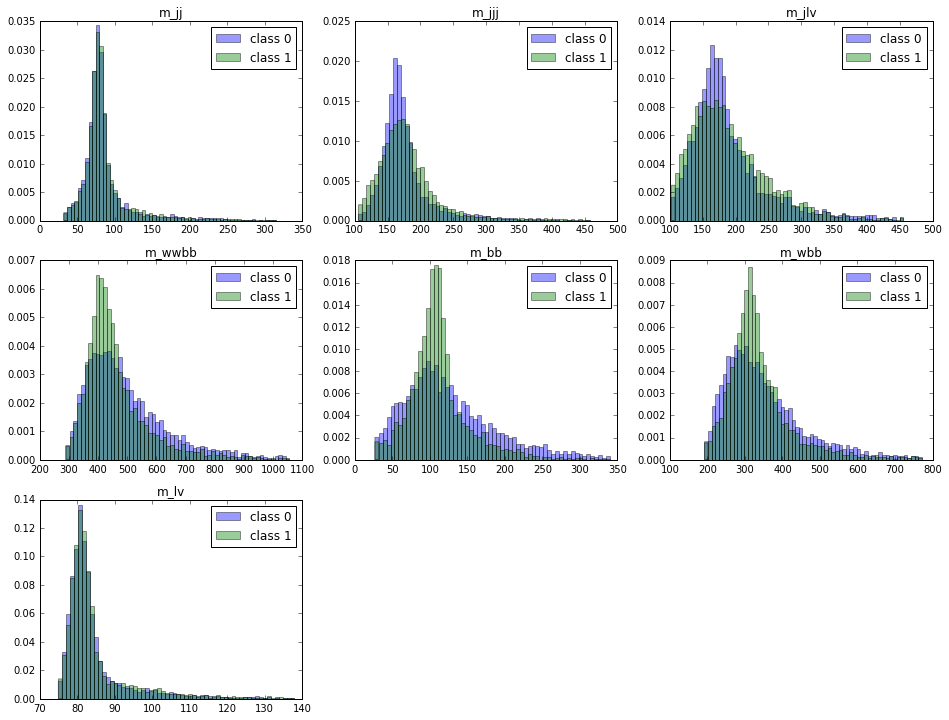

In [8]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(high_level_features):
    # add sub plot on our figure
    plt.subplot(len(features) // 5 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    plt.title(feature)

In [102]:
def add_features(data):
    data['ht'] = data['jet1_pt'] + data['jet2_pt'] + data['jet3_pt'] + data['jet4_pt']
    data['meff'] = data['jet1_pt'] + data['jet2_pt'] + data['jet3_pt'] + data['jet4_pt'] + data['lepton_pt'] + data['mem_pt']
    
    data['dr_j12'] = dr(data['jet1_eta'], data['jet2_eta'], data['jet1_phi'], data['jet2_phi'])
    data['dr_j34'] = dr(data['jet3_eta'], data['jet4_eta'], data['jet3_phi'], data['jet4_phi'])
    data['dr_lj1'] = dr(data['jet1_eta'], data['lepton_eta'], data['jet1_phi'], data['lepton_phi'])
    data['dr_lj2'] = dr(data['jet2_eta'], data['lepton_eta'], data['jet2_phi'], data['lepton_phi'])
    
    data['dphi_met_j1'] = dphi(data['mem_phi'], data['jet1_phi'])
    data['dphi_met_j2'] = dphi(data['mem_phi'], data['jet2_phi'])
    data['dphi_met_j3'] = dphi(data['mem_phi'], data['jet3_phi'])
    data['dphi_met_j4'] = dphi(data['mem_phi'], data['jet4_phi'])
    
    variables = ['ht', 'meff',
                 'dr_j12', 'dr_j34', 'dr_lj1', 'dr_lj2',
                 'dphi_met_j1', 'dphi_met_j2', 'dphi_met_j3', 'dphi_met_j4', ]
    
    objects = ['lepton', 'jet1', 'jet2', 'jet3', 'jet4']
    
    for obj in objects:
        data['%s_abs_eta' % obj] = np.abs(data['%s_eta' % obj])
        variables.append('%s_abs_eta' % obj)
        
        for obj2 in objects:
            if obj == obj2:
                continue
            
            dphi_name = "dphi_%s_%s" % (obj, obj2)
            deta_name = "deta_%s_%s" % (obj, obj2)
            
            data[dphi_name] = np.abs(dphi(data['%s_phi' % obj], data['%s_phi' % obj2]))
            data[deta_name] = np.abs(data['%s_eta' % obj] - data['%s_eta' % obj2])
            
            variables += [dphi_name, deta_name]
    
    return variables

new_features = add_features(data)
#add_features(full_data)
add_features(test)

['ht',
 'meff',
 'dr_j12',
 'dr_j34',
 'dr_lj1',
 'dr_lj2',
 'dphi_met_j1',
 'dphi_met_j2',
 'dphi_met_j3',
 'dphi_met_j4',
 'lepton_abs_eta',
 'dphi_lepton_jet1',
 'deta_lepton_jet1',
 'dphi_lepton_jet2',
 'deta_lepton_jet2',
 'dphi_lepton_jet3',
 'deta_lepton_jet3',
 'dphi_lepton_jet4',
 'deta_lepton_jet4',
 'jet1_abs_eta',
 'dphi_jet1_lepton',
 'deta_jet1_lepton',
 'dphi_jet1_jet2',
 'deta_jet1_jet2',
 'dphi_jet1_jet3',
 'deta_jet1_jet3',
 'dphi_jet1_jet4',
 'deta_jet1_jet4',
 'jet2_abs_eta',
 'dphi_jet2_lepton',
 'deta_jet2_lepton',
 'dphi_jet2_jet1',
 'deta_jet2_jet1',
 'dphi_jet2_jet3',
 'deta_jet2_jet3',
 'dphi_jet2_jet4',
 'deta_jet2_jet4',
 'jet3_abs_eta',
 'dphi_jet3_lepton',
 'deta_jet3_lepton',
 'dphi_jet3_jet1',
 'deta_jet3_jet1',
 'dphi_jet3_jet2',
 'deta_jet3_jet2',
 'dphi_jet3_jet4',
 'deta_jet3_jet4',
 'jet4_abs_eta',
 'dphi_jet4_lepton',
 'deta_jet4_lepton',
 'dphi_jet4_jet1',
 'deta_jet4_jet1',
 'dphi_jet4_jet2',
 'deta_jet4_jet2',
 'dphi_jet4_jet3',
 'deta_jet4_jet3

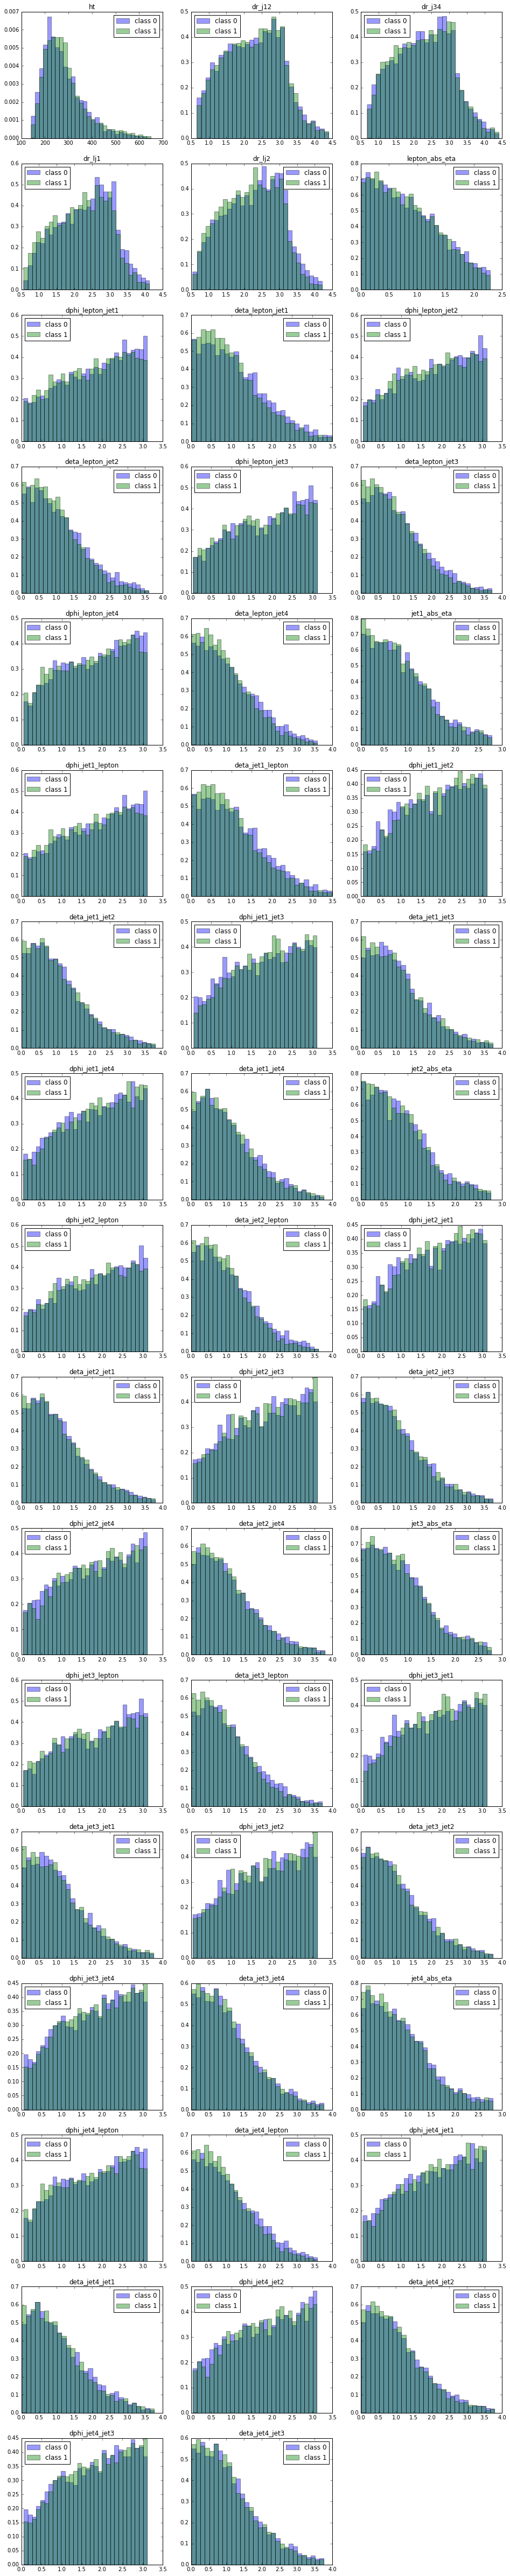

In [39]:
hist_params = {'normed': True, 'bins': 30, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, (len(new_features)//3 + 1) * 5))
for n, feature in enumerate(new_features):
    # add sub plot on our figure
    plt.subplot(len(new_features) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    plt.title(feature)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.

In [104]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.9)
#full_train, full_valid = train_test_split(full_data, random_state=11, train_size=0.9)

### Simple knn from `sklearn` training

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(training_data[high_level_features], training_data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [14]:
# predict validation sample (probability for each event)
proba = knn.predict_proba(validation_data[high_level_features])

In [15]:
proba

array([[ 0.33333333,  0.66666667],
       [ 0.33333333,  0.66666667],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.66666667,  0.33333333],
       [ 0.5       ,  0.5       ],
       [ 0.66666667,  0.33333333]])

### Compute quality (ROC AUC) on the validation set (to prevent overestimating quality)

In [16]:
# take probability to be 1 class to compute ROC AUC
roc_auc_score(validation_data.target, proba[:, 1])

0.70958288471424869

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


tab completion not implemented for this context

tab completion not implemented for this context

tab completion not implemented for this context

tab completion not implemented for this context

tab completion not implemented for this context


## Cross validation

In [46]:
from sklearn.base import BaseEstimator
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_auc_score

class CVEstimator(BaseEstimator):
    def __init__(self, cv, est_type, args={}):
        self.cv = cv
        self.estimator_type = est_type
        self.estimator_args = args
        
        self.estimators = [est_type(**args) for _ in xrange(self.cv)]
        
    def fit(self, x, y):
        skf = StratifiedKFold(y.copy(), self.cv)
        
        self.scores = []
        
        for i, train_test in enumerate(skf):
            est = self.estimators[i]
            train, test = train_test
            
            est.fit(x.iloc[train], y.iloc[train])
            
            pred = est.predict_proba(x.iloc[test])[:,1]
            score = roc_auc_score(y.iloc[test], pred)
            self.scores.append(score)
            
        # calculate feature importance
        score_norm = 1 / sum(self.scores)
        self.feature_importances_ = []
        
        for i in xrange(len(self.estimators[0].feature_importances_)):
            imp_sum = 0
            for j, est in enumerate(self.estimators):
                imp_sum += self.scores[j] * est.feature_importances_[i]
            
            self.feature_importances_.append(imp_sum * score_norm)
            
        
        return self
    
    def predict_proba(self, x):
        pred = None
        
        for est in self.estimators:
            this_pred = est.predict_proba(x)
            if pred is None:
                pred = this_pred
            else:
                pred += this_pred
        
        pred /= self.cv
        return pred


tab completion not implemented for this context


In [111]:
def check_single(features, alg, *args, **kwargs):
    train=training_data
    test=validation_data
    
    est = alg(*args, **kwargs)
    
    est.fit(train[features], train.target)
    pred = est.predict_proba(test[features])
    print "AUC", roc_auc_score(test.target, pred[:,1])

    for name, importance in sorted(zip(features, est.feature_importances_), key=lambda x: x[1], reverse=True):
        print "%10s" % name, importance
    
    return est

def check_cve(features, *args, **kwargs):
    return check_single(features, CVEstimator, *args, **kwargs)

def make_cve(features, *args, **kwargs):
    est = CVEstimator(*args, **kwargs)
    
    est.fit(full_train[features], full_train.target)
    pred = est.predict_proba(full_valid[features])
    print "AUC", roc_auc_score(full_valid.target, pred[:,1])

    for name, importance in sorted(zip(features, est.feature_importances_), key=lambda x: x[1], reverse=True):
        print "%10s" % name, importance
    
    return est

In [197]:
cve = CVEstimator(6, GradientBoostingClassifier, {'max_depth':6})
cve.fit(training_data[high_level_features], training_data.target)


CVEstimator(args=None, cv=6, est_type=None)

In [199]:
pred = cve.predict_proba(validation_data[high_level_features])

In [200]:
roc_auc_score(validation_data.target, pred[:,1])

0.76189723955496991

In [91]:
objects = ['lepton', 'jet1', 'jet2', 'jet3', 'jet4']
selected_features = high_level_features + ["%s_pt" % obj for obj in objects] + new_features

#cve = check_cve(selected_features, 6, GradientBoostingClassifier, {'max_depth': 6})

#best 0.7876

check_single(selected_features, GradientBoostingClassifier, max_depth=6)
check_single(selected_features, GradientBoostingClassifier, max_depth=3)

check_cve(selected_features, 6, GradientBoostingClassifier, {'max_depth':6})
check_cve(selected_features, 6, GradientBoostingClassifier, {'max_depth':3})

AUC 0.779374436993
      m_bb 0.0756601053722
    m_wwbb 0.0460618703594
     m_wbb 0.0401663238812
     m_jjj 0.0390234476037
     m_jlv 0.0384052239647
        ht 0.0329064454095
      meff 0.0293327028167
 lepton_pt 0.0288898199682
      m_jj 0.0282048851655
dphi_met_j2 0.0228894580562
   jet1_pt 0.0217478830767
   jet4_pt 0.0202980602881
dphi_met_j3 0.0201653063787
   jet3_pt 0.0195267604069
jet2_abs_eta 0.018906341159
jet4_abs_eta 0.0186916139229
    dr_lj1 0.0185887150375
jet1_abs_eta 0.0183477697365
    dr_lj2 0.0173649402767
      m_lv 0.0171161905341
   jet2_pt 0.015892018357
deta_lepton_jet4 0.0156918702344
dphi_met_j1 0.0156815807504
    dr_j34 0.0147302554435
    dr_j12 0.014621312019
deta_lepton_jet2 0.0142218300212
lepton_abs_eta 0.013918823658
dphi_met_j4 0.013843783765
jet3_abs_eta 0.0135292535339
dphi_jet4_lepton 0.0133956026819
deta_jet1_jet2 0.0117542653641
deta_jet2_jet4 0.0115948467969
deta_jet2_lepton 0.010596722898
deta_jet4_jet3 0.0100484557283
dphi_lepton_jet4 

CVEstimator(args=None, cv=6, est_type=None)

## Prepare submission to kaggle

In [113]:
# predict test sample

#cve = check_cve(features, 6, GradientBoostingClassifier, {'max_depth': 6})

cve = check_cve(selected_features, 6, GradientBoostingClassifier, {'max_depth': 6})

add_features(test)

kaggle_proba = cve.predict_proba(test[selected_features])[:, 1]
kaggle_ids = test.event_id

print kaggle_proba

AUC 0.802541218109
      m_bb 0.10253691567
    m_wwbb 0.0656983061678
 lepton_pt 0.0560332637341
     m_jlv 0.0558909936669
     m_jjj 0.0544771564893
        ht 0.0523668735103
     m_wbb 0.0491346811867
      meff 0.0422894186842
      m_jj 0.0394451021729
   jet3_pt 0.0202643337328
   jet2_pt 0.0200598172145
   jet1_pt 0.0198226240859
      m_lv 0.0196237584527
   jet4_pt 0.0163084522845
    dr_j12 0.0157898268629
    dr_lj1 0.0153400579335
    dr_lj2 0.0150229176362
    dr_j34 0.0130222303853
dphi_met_j2 0.0124326186502
dphi_met_j3 0.0121595439623
dphi_met_j4 0.0112228330158
jet4_abs_eta 0.0109362434378
lepton_abs_eta 0.0107943110985
dphi_met_j1 0.00937882357638
deta_jet4_lepton 0.00914142412632
deta_lepton_jet2 0.00903935603118
deta_lepton_jet3 0.00902905498896
deta_jet3_lepton 0.00896472836362
deta_lepton_jet4 0.00883003073099
jet3_abs_eta 0.00845838356896
dphi_lepton_jet3 0.00843333149306
jet1_abs_eta 0.00807968766515
dphi_jet3_lepton 0.00762487034748
dphi_lepton_jet4 0.0076149

In [114]:
from IPython.display import FileLink
def create_solution(ids, proba, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    pandas.DataFrame({'event_id': ids, 'prediction': proba}).to_csv('datasets/{}'.format(filename), index=False)
    return FileLink('datasets/{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba, 'b_gradient_cv6_meff.csv')

/home/jan/work/mlhep/mlhep2016/higgs_kaggle/datasets/b_gradient_cv6_meff.csv